In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

import gc


# 1️⃣data load
- train 잔액정보
- segment

In [2]:
df = pd.read_parquet('train_잔액정보.parquet')

In [3]:
df_segment = pd.read_parquet('train_segment.parquet')

In [13]:
# 7월만 볼거임
# 연체일수가 
# df07 = df[df['기준년월'] == 201807]
# df_segment07 = df_segment.head(400000)

# 8월만 볼거임
df08 = df[df['기준년월'] == 201808]
df_segment_08 = df_segment.iloc[400000:800000]

In [15]:
df08.head()

,기준년월,ID,잔액_일시불_B0M,잔액_할부_B0M,잔액_현금서비스_B0M,잔액_리볼빙일시불이월_B0M,잔액_리볼빙CA이월_B0M,잔액_카드론_B0M,월중평잔_일시불_B0M,월중평잔_할부_B0M,...,평잔_6M,평잔_일시불_6M,평잔_일시불_해외_6M,평잔_RV일시불_6M,평잔_RV일시불_해외_6M,평잔_할부_6M,평잔_할부_해외_6M,평잔_CA_6M,평잔_CA_해외_6M,평잔_카드론_6M
400000,201808,TRAIN_000000,780,936,24211,0,0,0,1092,595,...,20807,2697,0,0,0,627,0,19050,0,0
400001,201808,TRAIN_000001,2898,2018,0,0,0,0,2850,2244,...,6894,2547,0,2951,0,2648,0,0,0,0
400002,201808,TRAIN_000002,6360,4057,22924,6740,0,0,5416,5370,...,57338,7804,0,5582,0,4647,0,41423,0,0
400003,201808,TRAIN_000003,1195,4242,24265,0,0,0,873,3088,...,26993,1170,0,0,0,3361,0,19491,0,0
400004,201808,TRAIN_000004,0,0,0,0,0,0,0,0,...,36,26,0,0,0,0,0,0,0,0


In [13]:
del df
del df_segment
gc.collect()

485

In [16]:
df_c = pd.concat([df08, df_segment_08],axis=1)
df_c.head(5)

,기준년월,ID,잔액_일시불_B0M,잔액_할부_B0M,잔액_현금서비스_B0M,잔액_리볼빙일시불이월_B0M,잔액_리볼빙CA이월_B0M,잔액_카드론_B0M,월중평잔_일시불_B0M,월중평잔_할부_B0M,...,평잔_일시불_해외_6M,평잔_RV일시불_6M,평잔_RV일시불_해외_6M,평잔_할부_6M,평잔_할부_해외_6M,평잔_CA_6M,평잔_CA_해외_6M,평잔_카드론_6M,ID,Segment
400000,201808,TRAIN_000000,780,936,24211,0,0,0,1092,595,...,0,0,0,627,0,19050,0,0,TRAIN_000000,D
400001,201808,TRAIN_000001,2898,2018,0,0,0,0,2850,2244,...,0,2951,0,2648,0,0,0,0,TRAIN_000001,E
400002,201808,TRAIN_000002,6360,4057,22924,6740,0,0,5416,5370,...,0,5582,0,4647,0,41423,0,0,TRAIN_000002,C
400003,201808,TRAIN_000003,1195,4242,24265,0,0,0,873,3088,...,0,0,0,3361,0,19491,0,0,TRAIN_000003,D
400004,201808,TRAIN_000004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,TRAIN_000004,E


In [17]:
del df08
del df_segment_08
gc.collect()

482

# 2️⃣data
- 수치형, 범주형으로 분리
- 수치형
    - segment 원핫인코딩
    - 상관관계 분석
- 범주형
    - 카이제곱분포


In [18]:
df_c.describe()

,기준년월,잔액_일시불_B0M,잔액_할부_B0M,잔액_현금서비스_B0M,잔액_리볼빙일시불이월_B0M,잔액_리볼빙CA이월_B0M,잔액_카드론_B0M,월중평잔_일시불_B0M,월중평잔_할부_B0M,월중평잔_CA_B0M,...,평잔_6M,평잔_일시불_6M,평잔_일시불_해외_6M,평잔_RV일시불_6M,평잔_RV일시불_해외_6M,평잔_할부_6M,평잔_할부_해외_6M,평잔_CA_6M,평잔_CA_해외_6M,평잔_카드론_6M
count,400000.0,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,...,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000
mean,201808.0,3381.587485,1586.432352,687.938240,338.728567,9.267350,2526.827255,3789.466978,1910.676215,703.395190,...,12113.628468,4127.665203,44.764885,1044.703338,10.548925,2631.825728,1.516070,852.255940,0.354155,3130.099427
std,0.0,6423.126330,3481.514191,3555.311966,2115.165775,492.915907,11762.672580,6895.794663,5523.047909,3897.655497,...,30059.042627,7081.308444,133.863998,5029.389358,62.777071,7656.407991,44.452072,4954.905135,20.642352,15355.260561
min,201808.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,201808.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,288.000000,136.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,201808.0,1351.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1513.000000,0.000000,0.000000,...,3516.000000,1697.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,201808.0,3957.000000,1960.000000,0.000000,0.000000,0.000000,0.000000,4583.000000,1629.000000,0.000000,...,10390.000000,5012.000000,0.000000,0.000000,0.000000,1976.000000,0.000000,0.000000,0.000000,0.000000
max,201808.0,222767.000000,58700.000000,62382.000000,31623.000000,46909.000000,199532.000000,176138.000000,154115.000000,89608.000000,...,299154.000000,176861.000000,2818.000000,156888.000000,938.000000,140901.000000,2518.000000,140478.000000,1352.000000,225000.000000


In [19]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400000 entries, 0 to 399999
Data columns (total 60 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   기준년월             400000 non-null  int64 
 1   ID               400000 non-null  object
 2   잔액_일시불_B0M       400000 non-null  int64 
 3   잔액_할부_B0M        400000 non-null  int64 
 4   잔액_현금서비스_B0M     400000 non-null  int64 
 5   잔액_리볼빙일시불이월_B0M  400000 non-null  int64 
 6   잔액_리볼빙CA이월_B0M   400000 non-null  int64 
 7   잔액_카드론_B0M       400000 non-null  int64 
 8   월중평잔_일시불_B0M     400000 non-null  int64 
 9   월중평잔_할부_B0M      400000 non-null  int64 
 10  월중평잔_CA_B0M      400000 non-null  int64 
 11  연체잔액_B0M         400000 non-null  int64 
 12  연체잔액_일시불_B0M     400000 non-null  int64 
 13  연체잔액_할부_B0M      400000 non-null  int64 
 14  연체잔액_현금서비스_B0M   400000 non-null  int64 
 15  연체잔액_카드론_B0M     400000 non-null  int64 
 16  연체잔액_대환론_B0M     400000 non-null  int64 
 17  잔액_현금서비스_B1M   

In [19]:
# df에서 dtype이 int64인 것을 수치형, object인 것을 범주형으로 분리
num_list = []
cat_list = []

columns_list = df_c.columns.tolist()
data_list = df_c.dtypes.tolist()

for i in range(len(columns_list)):
    if data_list[i] == 'int64':
        if columns_list[i] == '기준년월':
            continue
        num_list.append(columns_list[i])
    elif data_list[i] == 'object':
        cat_list.append(columns_list[i])
    else:
        print(f"{columns_list[i]}: 땡")


print("수치형 컬럼:", num_list)
print("범주형 컬럼:", cat_list)

수치형 컬럼: ['잔액_일시불_B0M', '잔액_할부_B0M', '잔액_현금서비스_B0M', '잔액_리볼빙일시불이월_B0M', '잔액_리볼빙CA이월_B0M', '잔액_카드론_B0M', '월중평잔_일시불_B0M', '월중평잔_할부_B0M', '월중평잔_CA_B0M', '연체잔액_B0M', '연체잔액_일시불_B0M', '연체잔액_할부_B0M', '연체잔액_현금서비스_B0M', '연체잔액_카드론_B0M', '연체잔액_대환론_B0M', '잔액_현금서비스_B1M', '잔액_현금서비스_B2M', '잔액_카드론_B1M', '잔액_카드론_B5M', '잔액_할부_B1M', '잔액_할부_B2M', '잔액_일시불_B1M', '잔액_일시불_B2M', '연체일수_B1M', '연체일수_B2M', '연체원금_B1M', '연체원금_B2M', '연체일수_최근', '연체원금_최근', '최종연체회차', '매각잔액_B1M', 'RV_평균잔액_R12M', 'RV_최대잔액_R12M', 'RV_평균잔액_R3M', 'RV_최대잔액_R3M', '잔액_할부_유이자_B0M', '잔액_할부_무이자_B0M', '잔액_할부_해외_B0M', '연체잔액_RV일시불_B0M', '연체잔액_CA_B0M', '월중평잔', '월중평잔_일시불', '월중평잔_RV일시불', '월중평잔_할부', '월중평잔_CA', '월중평잔_카드론', '평잔_6M', '평잔_일시불_6M', '평잔_일시불_해외_6M', '평잔_RV일시불_6M', '평잔_RV일시불_해외_6M', '평잔_할부_6M', '평잔_할부_해외_6M', '평잔_CA_6M', '평잔_CA_해외_6M', '평잔_카드론_6M']
범주형 컬럼: ['ID', 'ID', 'Segment']


In [20]:
# segment 컬럼 원핫인코딩
df_all = pd.get_dummies(df_c, columns=['Segment'], prefix='segment', drop_first=False)

In [21]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400000 entries, 400000 to 799999
Data columns (total 64 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   기준년월             400000 non-null  int64 
 1   ID               400000 non-null  object
 2   잔액_일시불_B0M       400000 non-null  int64 
 3   잔액_할부_B0M        400000 non-null  int64 
 4   잔액_현금서비스_B0M     400000 non-null  int64 
 5   잔액_리볼빙일시불이월_B0M  400000 non-null  int64 
 6   잔액_리볼빙CA이월_B0M   400000 non-null  int64 
 7   잔액_카드론_B0M       400000 non-null  int64 
 8   월중평잔_일시불_B0M     400000 non-null  int64 
 9   월중평잔_할부_B0M      400000 non-null  int64 
 10  월중평잔_CA_B0M      400000 non-null  int64 
 11  연체잔액_B0M         400000 non-null  int64 
 12  연체잔액_일시불_B0M     400000 non-null  int64 
 13  연체잔액_할부_B0M      400000 non-null  int64 
 14  연체잔액_현금서비스_B0M   400000 non-null  int64 
 15  연체잔액_카드론_B0M     400000 non-null  int64 
 16  연체잔액_대환론_B0M     400000 non-null  int64 
 17  잔액_현금서비스_B

In [22]:
# 'segment'가 컬럼명에 포함된 컬럼만 리스트로 추출
seg_list = [col for col in df_all.columns if 'segment' in col]
seg_list

['segment_A', 'segment_B', 'segment_C', 'segment_D', 'segment_E']

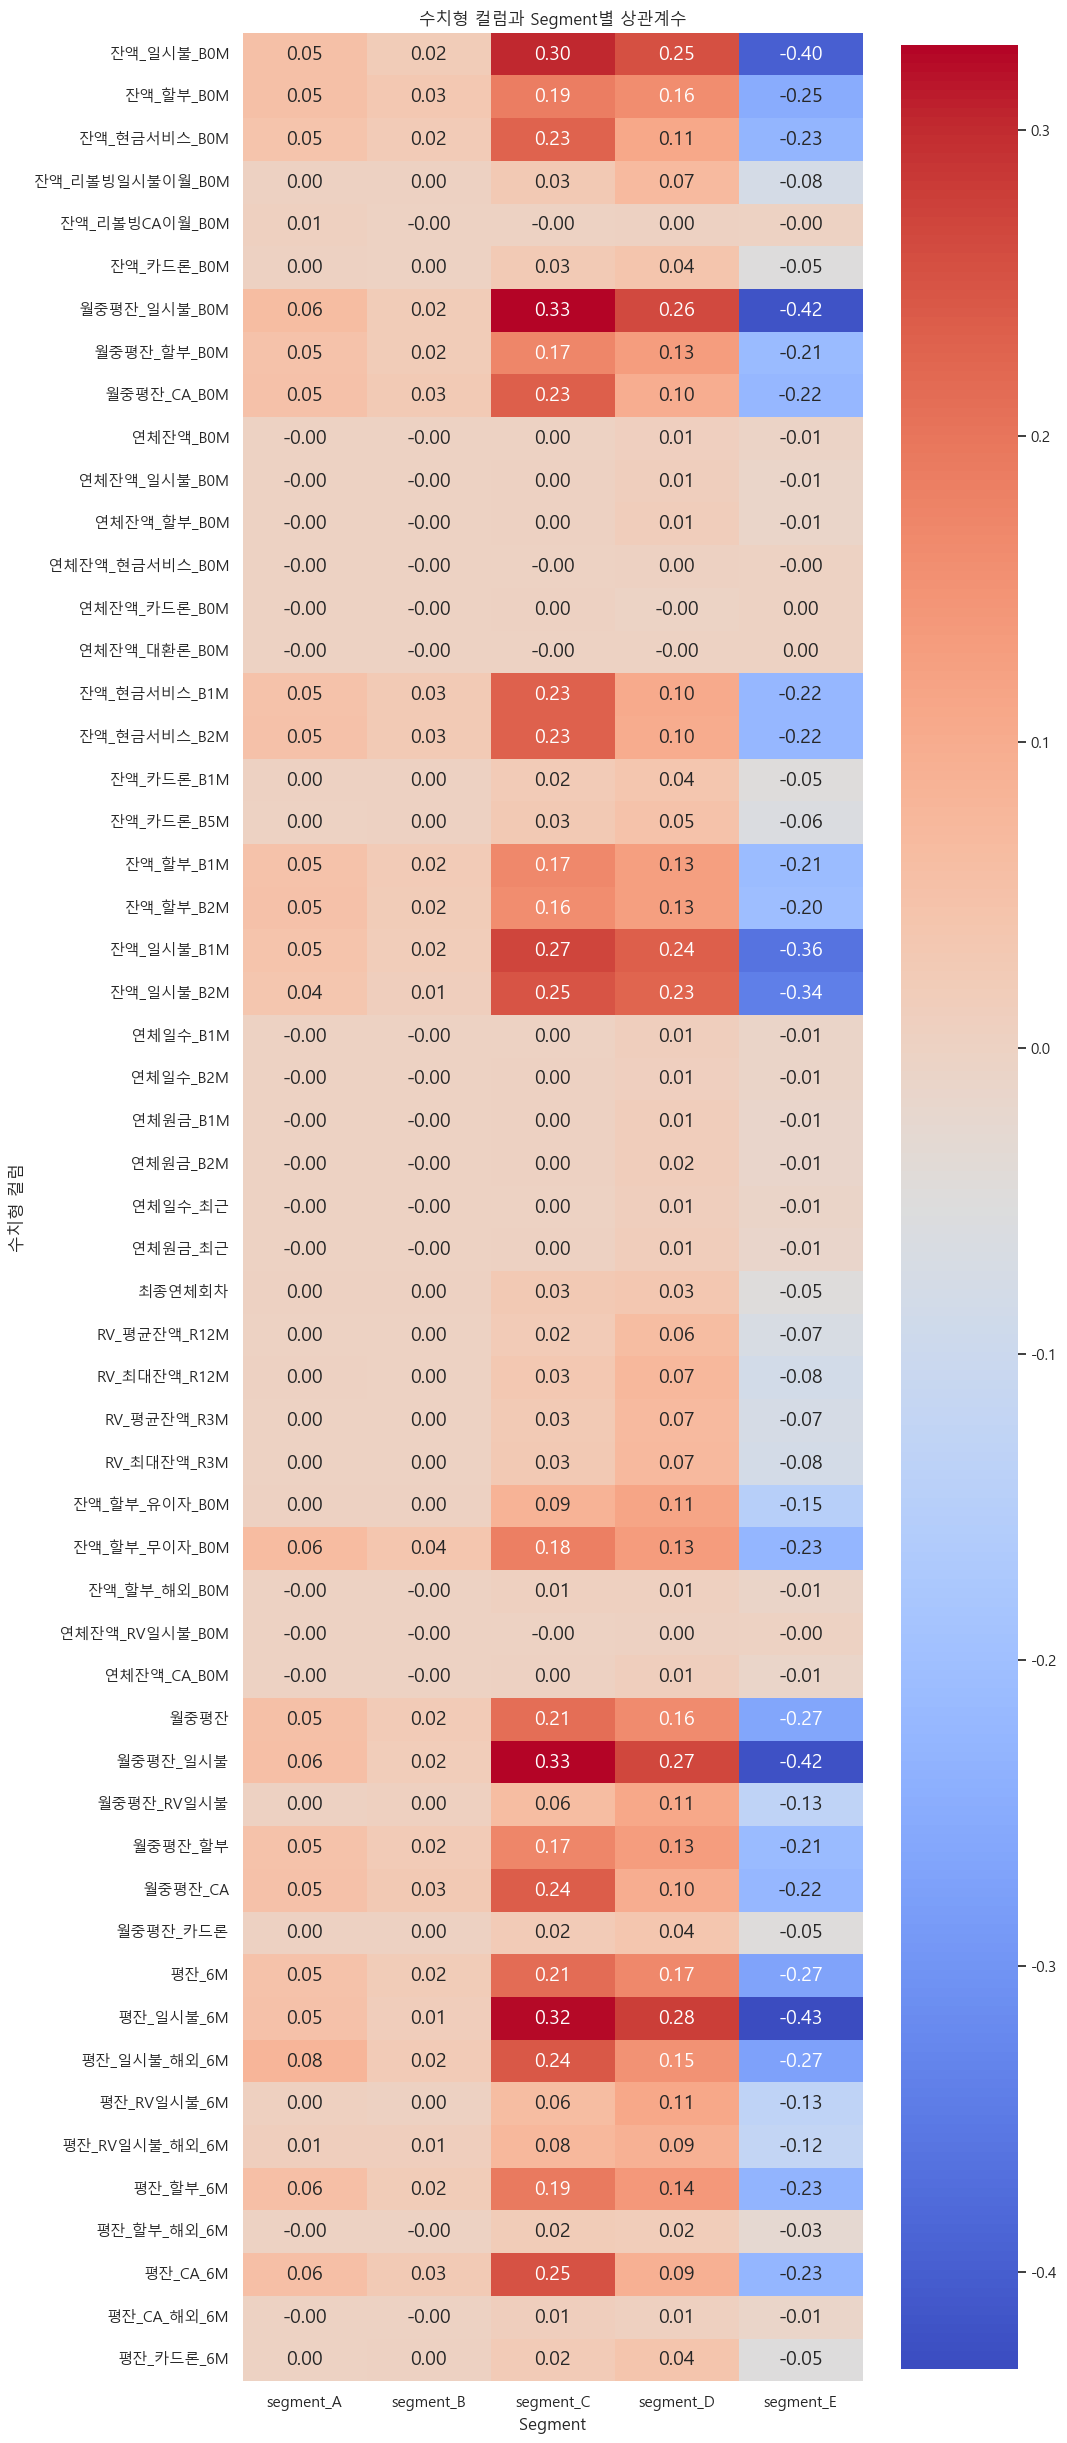

In [23]:
# num_list2의 컬럼들과 seg_list2의 컬럼들의 상관계수 비교

# 값이 하나뿐인(표준편차 0) 컬럼 제거
# 기존에 제거 했었는데 7월로만 보니까 '연체일수_B2M' 부분에서 생김
# 시각화에서만 제거하겠음
unique_one_cols = [col for col in num_list if df_all[col].nunique() == 1]
filtered_num_list = [col for col in num_list if col not in unique_one_cols]

# 상관계수 계산
corr_df = pd.DataFrame(index=filtered_num_list, columns=seg_list)
for num_col in filtered_num_list:
    for seg_col in seg_list:
        corr_df.loc[num_col, seg_col] = df_all[num_col].corr(df_all[seg_col])
corr_df = corr_df.astype(float)

# 히트맵 시각화
plt.figure(figsize=(10, len(filtered_num_list)*0.5 + 3))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('수치형 컬럼과 Segment별 상관계수')
plt.xlabel('Segment')
plt.ylabel('수치형 컬럼')
plt.show()

In [25]:
threshold = 0.1
important_vars = corr_df[
    (corr_df.abs() > threshold).any(axis=1)
].index.tolist()

In [26]:
important_vars

['잔액_일시불_B0M',
 '잔액_할부_B0M',
 '잔액_현금서비스_B0M',
 '월중평잔_일시불_B0M',
 '월중평잔_할부_B0M',
 '월중평잔_CA_B0M',
 '잔액_현금서비스_B1M',
 '잔액_현금서비스_B2M',
 '잔액_할부_B1M',
 '잔액_할부_B2M',
 '잔액_일시불_B1M',
 '잔액_일시불_B2M',
 '잔액_할부_유이자_B0M',
 '잔액_할부_무이자_B0M',
 '월중평잔',
 '월중평잔_일시불',
 '월중평잔_RV일시불',
 '월중평잔_할부',
 '월중평잔_CA',
 '평잔_6M',
 '평잔_일시불_6M',
 '평잔_일시불_해외_6M',
 '평잔_RV일시불_6M',
 '평잔_RV일시불_해외_6M',
 '평잔_할부_6M',
 '평잔_CA_6M']